<a href="https://colab.research.google.com/github/wannasleepforlong/Speech-MNIST-Classification/blob/main/MNIST_Image_Generation_and_Noise_Reduction%5BAutoencoder%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Conv2D,LeakyReLU,Dropout,BatchNormalization,Dense,Flatten,Reshape,Conv2DTranspose,LeakyReLU,Input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers,Model,losses
latent_dim=64

class Autoencoder(Model): #Make a class autoencoder derived from model i.e. it inherits its properties
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(latent_dim, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
autoencoder = Autoencoder(latent_dim)


In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 24s 11ms/step - loss: 0.0253 - val_loss: 0.0172
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0139 - val_loss: 0.0133
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 9/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 10/20
1875/1875 [==============================] - 16s 8ms/step -

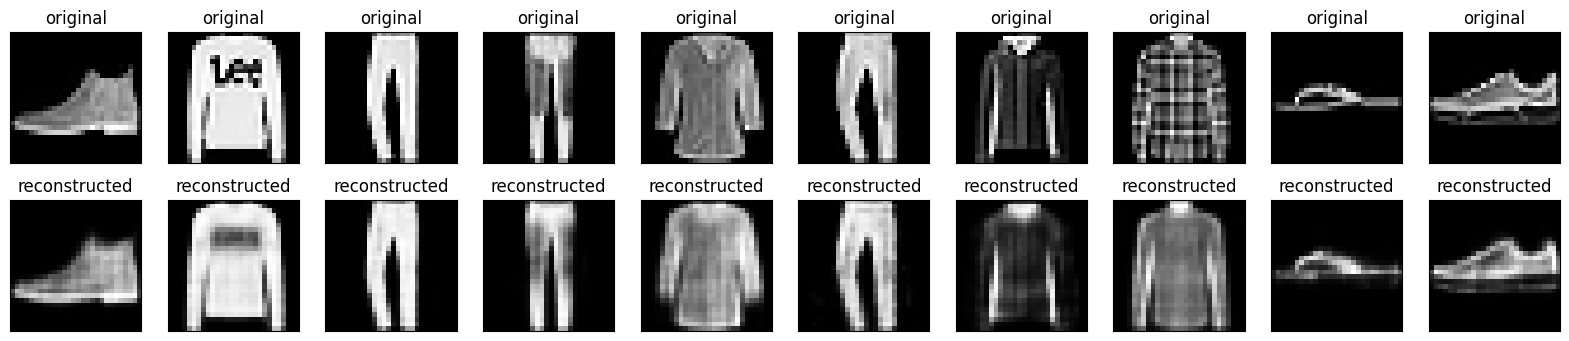

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.encoder.summary()
#First layer 28*28 shape of an image we flatten it
#We use ann to converge it to a latent_dim, the higher the latent dim is the more are features preserved

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
Total params: 112,896
Trainable params: 112,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 113,616
Trainable params: 113,616
Non-trainable params: 0
_________________________________________________________________


Now let us try to implement this in a noisy image using a Conv2D Autoencoder



When the UpSampling2D layer is applied, it performs a simple repetition of values to increase the size of the input. The repeated values help to fill in the gaps and generate a higher-resolution output and diubles height and width.

In [ ]:
class ConvAutoencoder(Model): #Make a class autoencoder derived from model i.e. it inherits its properties
  def __init__(self, latent_dim):
    super(ConvAutoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Reshape((28,28,1)),
      layers.Conv2D(64, (3,3),activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(32,(3,3), activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(latent_dim,(3,3), activation='relu',padding='same')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      layers.UpSampling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.UpSampling2D((2, 2)),
      layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
      layers.Reshape((28, 28))
])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
convautoencoder = ConvAutoencoder(latent_dim)
convautoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())

In [ ]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

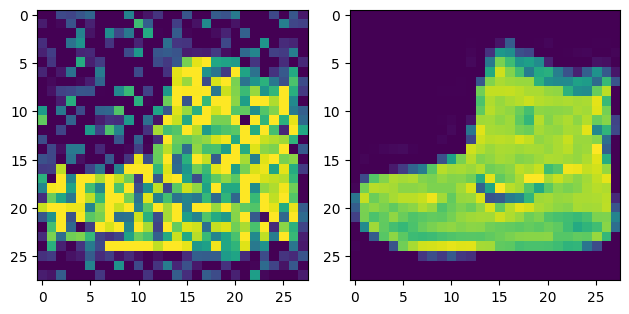

In [ ]:
image1 = x_train_noisy[0]
image2 = x_train[0]

fig, axes = plt.subplots(1, 2)

axes[0].imshow(image1)
axes[1].imshow(image2)
plt.tight_layout()
plt.show()

In [ ]:
convautoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
1875/1875 [==============================] - 361s 192ms/step - loss: 0.2816 - val_loss: 0.2780
Epoch 2/20
1875/1875 [==============================] - 343s 183ms/step - loss: 0.2739 - val_loss: 0.2750
Epoch 3/20
1875/1875 [==============================] - 337s 180ms/step - loss: 0.2716 - val_loss: 0.2745
Epoch 4/20
1875/1875 [==============================] - 343s 183ms/step - loss: 0.2703 - val_loss: 0.2724
Epoch 5/20
1875/1875 [==============================] - 343s 183ms/step - loss: 0.2695 - val_loss: 0.2715
Epoch 6/20
1875/1875 [==============================] - 343s 183ms/step - loss: 0.2690 - val_loss: 0.2711
Epoch 7/20
1875/1875 [==============================] - 344s 184ms/step - loss: 0.2686 - val_loss: 0.2709
Epoch 8/20
1875/1875 [==============================] - 346s 184ms/step - loss: 0.2683 - val_loss: 0.2705
Epoch 9/20
1875/1875 [==============================] - 344s 184ms/step - loss: 0.2681 - val_loss: 0.2705
Epoch 10/20
1875/1875 [=======================

In [ ]:
convautoencoder.encoder.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (32, 28, 28, 1)           0         
                                                                 
 conv2d_52 (Conv2D)          (32, 28, 28, 64)          640       
                                                                 
 max_pooling2d_39 (MaxPoolin  (32, 14, 14, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (32, 14, 14, 32)          18464     
                                                                 
 max_pooling2d_40 (MaxPoolin  (32, 7, 7, 32)           0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (32, 7, 7, 64)          

In [ ]:
convautoencoder.decoder.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (32, 7, 7, 32)            18464     
                                                                 
 up_sampling2d (UpSampling2D  (32, 14, 14, 32)         0         
 )                                                               
                                                                 
 conv2d_56 (Conv2D)          (32, 14, 14, 64)          18496     
                                                                 
 up_sampling2d_1 (UpSampling  (32, 28, 28, 64)         0         
 2D)                                                             
                                                                 
 conv2d_57 (Conv2D)          (32, 28, 28, 1)           577       
                                                                 
 reshape_20 (Reshape)        (32, 28, 28)            

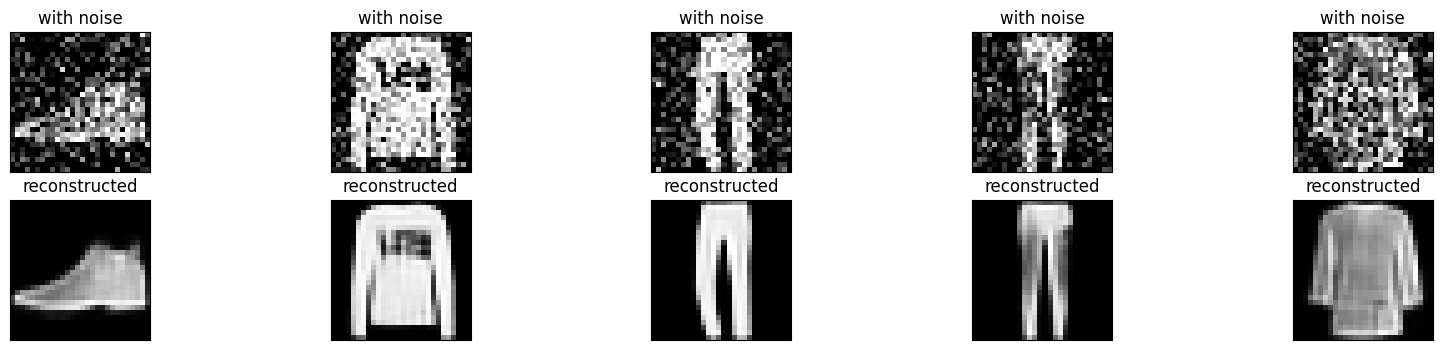

In [ ]:
encoded_imgs = convautoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = convautoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i])
  plt.title("with noise")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()